In [1]:
#Imprtanos librerias para alanizar Cardano
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
%pip install mplfinance
import mplfinance as mpf

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
df_cardano = pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Cardano.csv")
print(df_cardano.head())

   SNo     Name Symbol                 Date      High       Low      Open  \
0    1  Cardano    ADA  2017-10-02 23:59:59  0.030088  0.019969  0.024607   
1    2  Cardano    ADA  2017-10-03 23:59:59  0.027425  0.020690  0.025757   
2    3  Cardano    ADA  2017-10-04 23:59:59  0.022806  0.020864  0.020864   
3    4  Cardano    ADA  2017-10-05 23:59:59  0.022154  0.020859  0.021951   
4    5  Cardano    ADA  2017-10-06 23:59:59  0.021542  0.018360  0.021359   

      Close      Volume     Marketcap  
0  0.025932  57641300.0  6.288991e+08  
1  0.020816  16997800.0  5.396927e+08  
2  0.021931   9000050.0  5.686195e+08  
3  0.021489   5562510.0  5.571390e+08  
4  0.018539   7780710.0  4.806646e+08  


In [3]:
df_cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1374 non-null   int64  
 1   Name       1374 non-null   object 
 2   Symbol     1374 non-null   object 
 3   Date       1374 non-null   object 
 4   High       1374 non-null   float64
 5   Low        1374 non-null   float64
 6   Open       1374 non-null   float64
 7   Close      1374 non-null   float64
 8   Volume     1374 non-null   float64
 9   Marketcap  1374 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 107.5+ KB


In [4]:
df_cardano.shape

(1374, 10)

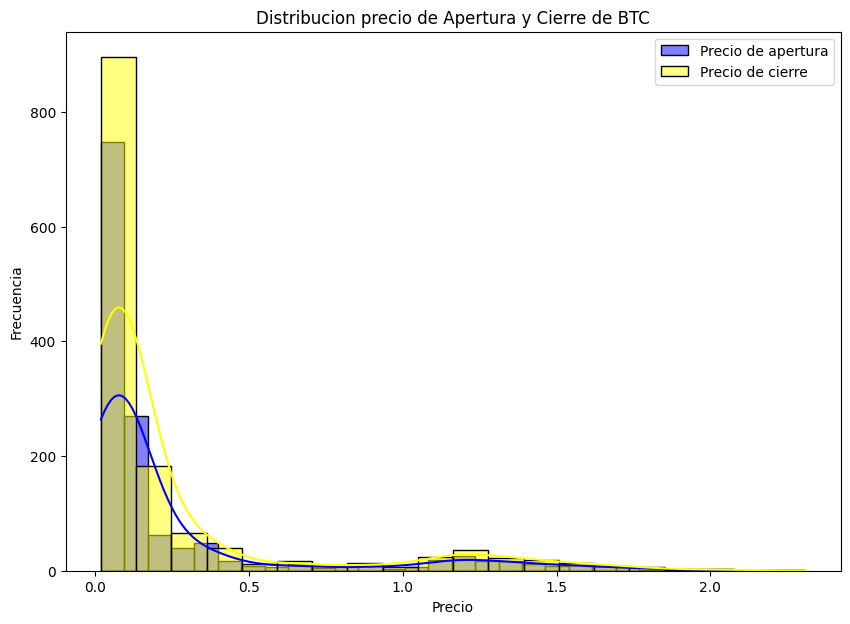

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df_cardano['Open'], bins=30, color='blue',kde=True , label= 'Precio de apertura')
sns.histplot(df_cardano['Close'], bins=20, color= 'yellow',kde= True, label='Precio de cierre')
plt.title('Distribucion precio de Apertura y Cierre de ADA')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

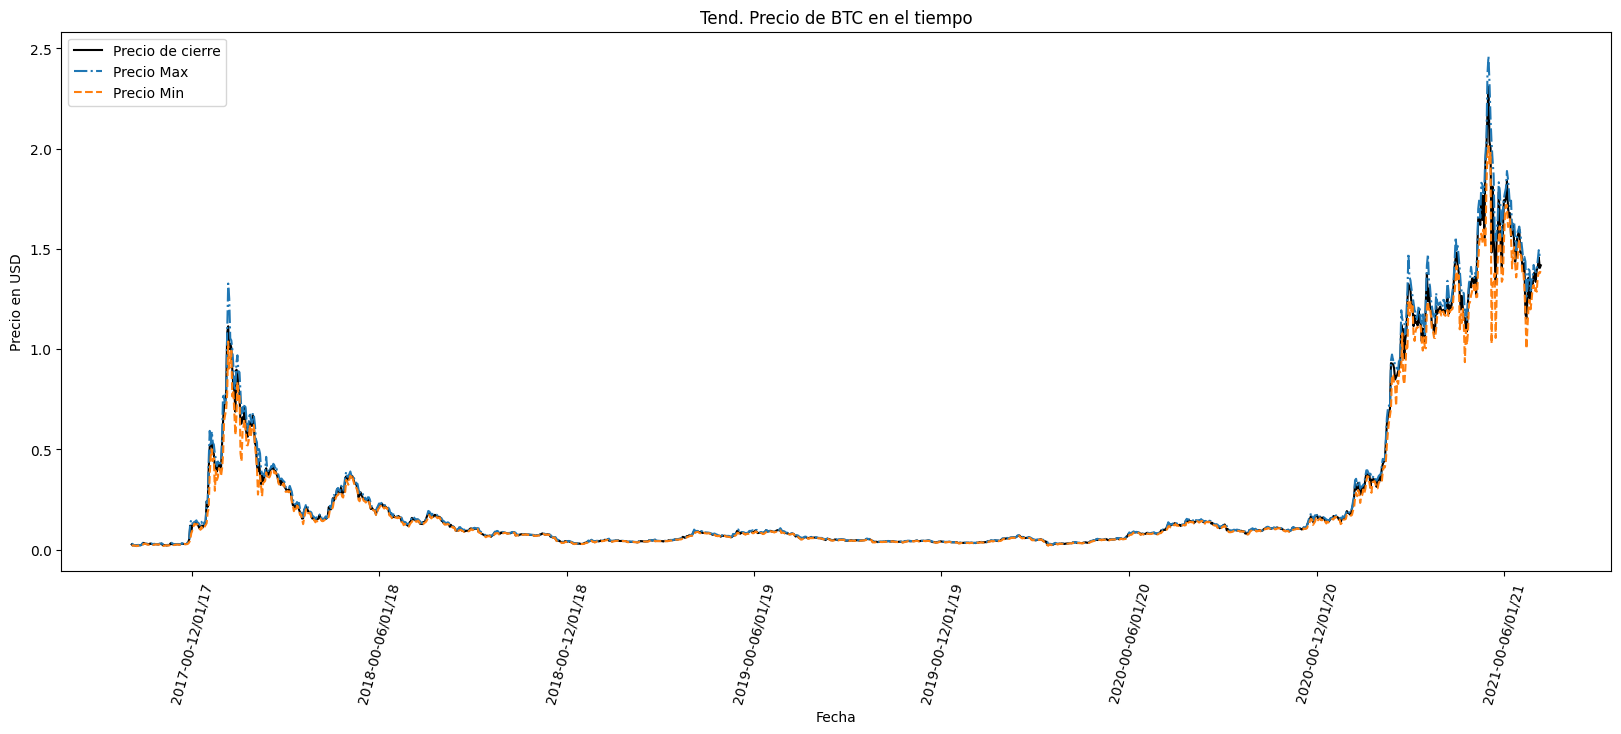

In [ ]:
plt.figure(figsize=(20,7))
plt.plot (df_cardano['Date'], df_cardano ['Close'], color= 'black', label='Precio de cierre') #cambiar color 
plt.plot(df_cardano ['Date'], df_cardano['High'], label='Precio Max', linestyle='-.')
plt.plot(df_cardano['Date'], df_cardano['Low'], label='Precio Min', linestyle='--')
plt.title('Tend. Precio de ADA en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=75)
plt.legend()
plt.show()

In [16]:
df_cardano ['Date']= pd.to_datetime(df_cardano['Date'])

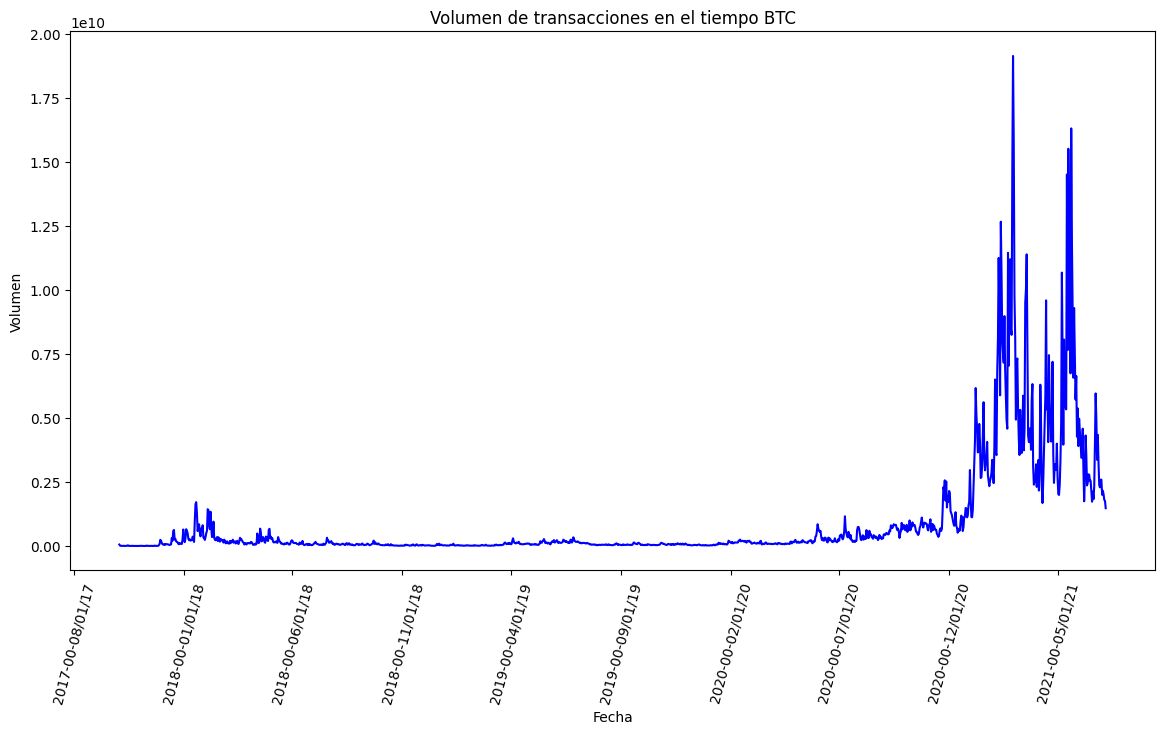

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df_cardano['Date'], df_cardano['Volume'], color='blue')
plt.title('Volumen de transacciones en el tiempo ADA')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=75)
plt.show()

In [19]:
df_cardano['Date']=pd.to_datetime(df_cardano['Date'])

In [20]:
#df_cardano.reset_index(inplace=True)
df_cardano.set_index('Date',inplace=True)

In [21]:
cardano_mensual = df_cardano.resample('M').agg({
    'Open': 'first',       # Primer valor del mes.
    'High': 'max',         # Máximo valor del mes.
    'Low': 'min',          # Mínimo valor del mes.
    'Close': 'last',       # Último valor del mes.
    'Volume': 'sum',       # Suma del volumen para el mes.
    'Marketcap': 'last'    # Último valor de la capitalización.
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16316\707098693.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cardano_mensual = df_cardano.resample('M').agg({


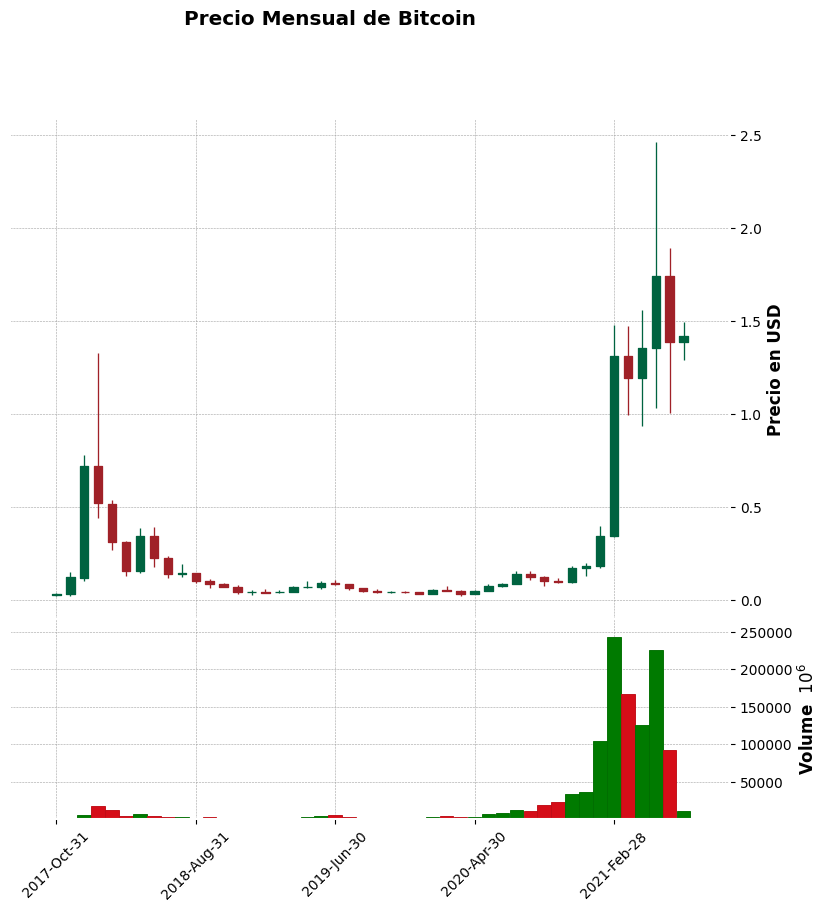

In [ ]:
mpf.plot(cardano_mensual, type='candle', style='charles',
         title='Precio Mensual de ADA',
         ylabel='Precio en USD',
         volume=True,
         figsize=(10, 10))